# ADS2 - Assignment 1 - Data Handling and Preparation

In this assignment, you will be analysing the popularity of films and TV shows on the streaming platform, Netflix. Using your knowledge of PySpark DataFrames and Spark SQL, you will produce a number of "downstream" data products to analyse trends in global streaming habits.

Download the dataset from this [Kaggle](https://www.kaggle.com/dhruvildave/netflix-top-10-tv-shows-and-films) page. A copy of the `all_weeks_countries.csv` file is also available on the canvas page for this assignment.

Your task is to load in the data and produce a number of "downstream" data products and plots as described below.

The PySpark installation and setup is provided below for conveinience.

In [1]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Download and unpack the latest version of Spark (3.2.0 as of writing)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [3]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [4]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [5]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# Exercise 1 - Data Preparation (5 Marks)


1.   Load the `all_weeks_countries.csv` into your Colab Notebook as a DataFrame.
2.   Create two separate DataFrames for Films and TV.
3.   For the Films data, drop the column containing the season names.
4.   For the TV data, replace any null values in the season name column with the show name.

In [6]:
# pyspark.sql.functions countains all the transformations and actions you will
# need
from pyspark.sql import functions as F

In [7]:
### Load the all_weeks_countries.csv into your Colab Notebook as a DataFrame.

# The file path
usersCsvPath = "/content/sample_data/all_weeks_countries.csv"

# Query to read data
NetflixDF = (spark
             .read
             .option('header', True)
             .option('inferSchema', True)
             .csv(usersCsvPath))

In [8]:
### Display the table and its schema

# Display Table
NetflixDF.show(5)
# Display Schema
NetflixDF.printSchema()

+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|   Argentina|          AR|2022-02-13|   Films|          1| The Tinder Swindler|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          2|   Through My Window|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          3|         Tall Girl 2|        null|                         1|
|   Argentina|          AR|2022-02-13|   Films|          4|13 Hours: The Sec...|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          5|       Into the Wind|        null|                         1|
+------------+------------+-----

In [9]:
### Seperate the data into two DataFrames for Films and TV
from pyspark.sql.functions import col

Netflix_films = NetflixDF.filter(col('category') == "Films") # Films dataframe
Netflix_TV = NetflixDF.filter(col('category') == "TV") # TV dataframe
Netflix_films.show(5)
Netflix_TV.show(5)

+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|   Argentina|          AR|2022-02-13|   Films|          1| The Tinder Swindler|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          2|   Through My Window|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          3|         Tall Girl 2|        null|                         1|
|   Argentina|          AR|2022-02-13|   Films|          4|13 Hours: The Sec...|        null|                         2|
|   Argentina|          AR|2022-02-13|   Films|          5|       Into the Wind|        null|                         1|
+------------+------------+-----

In [10]:
### Drop the 'season_title' column from the Films DataFrame, display the table

# Drop the column Season_title
Netflix_films = Netflix_films.drop(col('season_title'))
# Display Table
Netflix_films.show()


+------------+------------+----------+--------+-----------+--------------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+--------------------------+
|   Argentina|          AR|2022-02-13|   Films|          1| The Tinder Swindler|                         2|
|   Argentina|          AR|2022-02-13|   Films|          2|   Through My Window|                         2|
|   Argentina|          AR|2022-02-13|   Films|          3|         Tall Girl 2|                         1|
|   Argentina|          AR|2022-02-13|   Films|          4|13 Hours: The Sec...|                         2|
|   Argentina|          AR|2022-02-13|   Films|          5|       Into the Wind|                         1|
|   Argentina|          AR|2022-02-13|   Films|          6|       The Privilege|                         1|
|   Argentina|          AR|2

In [11]:
### Replace any null values in 'season_name' in the TV DataFrame with the
### corresponding 'show_name', display the table

from pyspark.sql.functions import coalesce
# replacing Null values with corresponding values of show_name column    
Netflix_TV = Netflix_TV.withColumn("season_title",coalesce(Netflix_TV.season_title,Netflix_TV.show_title))
#Display table
Netflix_TV.show(truncate = False)


+------------+------------+----------+--------+-----------+-------------------------------+-----------------------------------------+--------------------------+
|country_name|country_iso2|week      |category|weekly_rank|show_title                     |season_title                             |cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+-------------------------------+-----------------------------------------+--------------------------+
|Argentina   |AR          |2022-02-13|TV      |1          |Café con aroma de mujer        |Café con aroma de mujer: Season 1        |7                         |
|Argentina   |AR          |2022-02-13|TV      |2          |All of Us Are Dead             |All of Us Are Dead: Season 1             |3                         |
|Argentina   |AR          |2022-02-13|TV      |3          |The Queen of Flow              |The Queen of Flow: Season 2              |13                        |
|Argentina   |AR          |2022-02

# Exercise 2 - Most popular seasons by country (15 Marks)

1.   For each country in the data, find the highest rank each season of TV reached, and the number of weeks it spent in the top 10.
2.   Produce a DataFrame that contains the season of TV which spent the most time in each country's top 10.
3.   Produce a pie chart which shows how many countries the most popular seasons of TV occurred in. 


In [12]:
### Group the data by 'country_name' and 'season_title' and find the highest
### weekly rank and total weeks spent in the top 10 for each show, display the
### data
# .groupBy, .agg, F.max, F.min, .sort, .show


Netflix_TV.groupBy('country_name','season_title')\
          .agg(F.max('cumulative_weeks_in_top_10').alias('Max_weeks_in_Top_10'), 
               F.min('weekly_rank').alias('highest_rank')) \
          .sort('country_name').show(truncate = False)
                                                      
         

+------------+----------------------------------+-------------------+------------+
|country_name|season_title                      |Max_weeks_in_Top_10|highest_rank|
+------------+----------------------------------+-------------------+------------+
|Argentina   |Luis Miguel - The Series: Season 3|3                  |1           |
|Argentina   |Archive 81: Season 1              |1                  |4           |
|Argentina   |Ganglands: Season 1               |1                  |7           |
|Argentina   |Sweet Magnolias: Season 2         |1                  |8           |
|Argentina   |Grey's Anatomy: Season 17         |4                  |3           |
|Argentina   |Good Girls: Season 4              |2                  |6           |
|Argentina   |Elite: Season 4                   |3                  |3           |
|Argentina   |Locke & Key: Season 2             |2                  |7           |
|Argentina   |Sky Rojo: Season 2                |3                  |2           |
|Arg

In [13]:
### Find the season that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show

#Temporarily creating a table 
Netflix_TV_temp =  Netflix_TV.groupBy('country_name','season_title') \
                             .agg(F.max('cumulative_weeks_in_top_10').alias('Max_weeks_in_Top_10'), 
                                  F.min('weekly_rank').alias('highest_rank'))\
                             .sort('country_name')
#Using the table to get the desired output
Countries_season_list = Netflix_TV_temp.sort(col('country_name').asc(), col('max_weeks_in_top_10').desc()) \
                                       .groupBy('country_name')\
                                       .agg(F.first('season_title').alias('season_title'),
                                            F.max('max_weeks_in_top_10').alias('max_weeks_in_top_10'),
                                            F.first('highest_rank').alias('highest_rank'))
          
Countries_season_list.show(truncate = False)

+------------------+-------------------------------+-------------------+------------+
|country_name      |season_title                   |max_weeks_in_top_10|highest_rank|
+------------------+-------------------------------+-------------------+------------+
|Argentina         |Pasión de Gavilanes: Season 1  |33                 |4           |
|Australia         |Maid: Limited Series           |12                 |1           |
|Austria           |Squid Game: Season 1           |12                 |1           |
|Bahamas           |SpongeBob SquarePants: Season 9|15                 |3           |
|Bahrain           |Squid Game: Season 1           |16                 |1           |
|Bangladesh        |Squid Game: Season 1           |20                 |1           |
|Belgium           |Money Heist: Part 5            |12                 |1           |
|Bolivia           |Yo soy Betty, la fea: Season 1 |33                 |1           |
|Brazil            |Chiquititas                    |27

In [14]:
### Count the number of countries where each season spent the most time in the
### weekly top 10 lists
# .groupBy, .agg, F.count

# Counting the countries for each season
Countries_season_list = Countries_season_list.groupby('season_title') \
                                             .agg(F.count('country_name').alias('country_count'))\
                                             .sort(col('country_count').desc())

Countries_season_list.show(truncate = False)       

+------------------------------------------+-------------+
|season_title                              |country_count|
+------------------------------------------+-------------+
|Squid Game: Season 1                      |23           |
|Pasión de Gavilanes: Season 1             |7            |
|The Good Doctor: Season 1                 |7            |
|Yo soy Betty, la fea: Season 1            |6            |
|Money Heist: Part 1                       |5            |
|Maid: Limited Series                      |4            |
|Money Heist: Part 5                       |4            |
|The Queen of Flow: Season 1               |3            |
|PAW Patrol: Season 6                      |2            |
|Vincenzo: Season 1                        |2            |
|SpongeBob SquarePants: Season 9           |2            |
|Pablo Escobar, el patrón del mal: Season 1|2            |
|Hometown Cha-Cha-Cha: Season 1            |2            |
|Carrossel                                 |1           

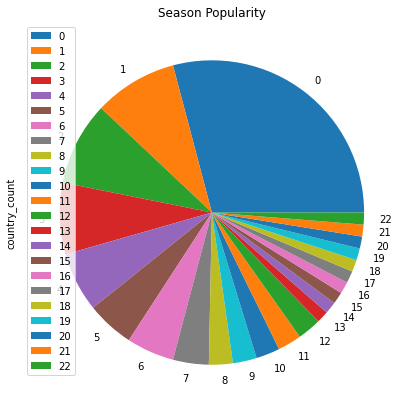

In [15]:
### Convert the DataFrame to a Pandas DataFrame, and display it as a pie chart
# .toPandas, .plot.pie

# Converting to pandas DF
Country_pd = Countries_season_list.toPandas()
# Setting Index
country_pd = Country_pd.set_index(['season_title'])
# Plotting Pie chart
Country_pd.plot.pie(y = 'country_count', title = 'Season Popularity', figsize = (7,7))


# Exercise 3 - Most popular shows by country (10 Marks)


1.   Calculate the number of weeks each TV show spent in each country's top 10, across all seasons, such that you don't double count a show when two or more seasons appear in one week.
2.   Produce a DataFrame that contains the show which spent the most time in each country's top 10.

In [16]:
### Group the data by 'country_name' and 'show_title' and count the number of
### weeks each show appears in each country's top 10 lists, as well as the
### highest weekly ranking. Display the data.
# .groupBy, .agg, F.count_distinct, F.min, .sort, .show

# Getting the highest rank and number of weeks in top10 for each show
Netflix_TV.groupBy('country_name', 'show_title')\
          .agg(F.count_distinct('cumulative_weeks_in_top_10').alias('Weeks_in_Top10'),
               F.min('weekly_rank').alias('highest_rank'))\
          .sort('country_name').show()

+------------+--------------------+--------------+------------+
|country_name|          show_title|Weeks_in_Top10|highest_rank|
+------------+--------------------+--------------+------------+
|   Argentina|           Blindspot|             1|          10|
|   Argentina|         Outer Banks|             2|           5|
|   Argentina|          Archive 81|             1|           4|
|   Argentina|           Ganglands|             1|           7|
|   Argentina|             Lucifer|             3|           2|
|   Argentina|              Arcane|             3|           3|
|   Argentina|Daughter From Ano...|             1|           7|
|   Argentina|        Señora Acero|             1|           9|
|   Argentina|Yo soy Betty, la fea|            21|           6|
|   Argentina|             The 100|             2|           5|
|   Argentina|            Sky Rojo|             3|           2|
|   Argentina|           Cobra Kai|             4|           1|
|   Argentina|   The Queen of Flow|     

In [17]:
### Find the show that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show


Netflix_TV_temp =  Netflix_TV.groupBy('country_name','show_title') \
                             .agg(F.max('cumulative_weeks_in_top_10').alias('Max_weeks_in_Top_10'), 
                                  F.min('weekly_rank').alias('highest_rank'))\
                             .sort('country_name')

Countries_Show_list = Netflix_TV_temp.sort(col('country_name').asc(), col('max_weeks_in_top_10').desc()) \
                                     .groupBy('country_name')\
                                     .agg(F.first('show_title').alias('show_title'),
                                          F.max('max_weeks_in_top_10').alias('max_weeks_in_top_10'),
                                          F.first('highest_rank').alias('highest_rank'))
                              
Countries_Show_list.show(truncate = False)

+------------------+----------------------+-------------------+------------+
|country_name      |show_title            |max_weeks_in_top_10|highest_rank|
+------------------+----------------------+-------------------+------------+
|Argentina         |Pasión de Gavilanes   |33                 |4           |
|Australia         |Animal Kingdom        |12                 |2           |
|Austria           |Squid Game            |12                 |1           |
|Bahamas           |SpongeBob SquarePants |15                 |3           |
|Bahrain           |Squid Game            |16                 |1           |
|Bangladesh        |Squid Game            |20                 |1           |
|Belgium           |Money Heist           |12                 |1           |
|Bolivia           |Yo soy Betty, la fea  |33                 |1           |
|Brazil            |Chiquititas           |27                 |2           |
|Bulgaria          |Squid Game            |16                 |1           |

# Exercise 4 - Movie popularity on Netflix (15 Marks)

1.   Calculate, for each Film, the number of weeks it spent in each country's number 1 spot, top 10 lists, and the highest weekly rank.
2.   Produce a Dataframe that, for each Film, contains:
    * the highest rank reached worldwide
    * the highest number of weeks it spent in a single country's top 10
    * the highest number of weeks it spent in a single country's number 1 spot
    * the mean number of weeks it spent in the top 10 lists worldwide
    * the mean number of weeks it spent in the number 1 spot worldwide
    * the number of countries where it reached the top 10
    * the number of countries where it reached the number 1 spot

In [18]:
### Find the highest weekly rank for each film in each country
### Calculate the number of weeks each film spent in each country's top 10
### Calculate the number of weeks each film spent at number 1 in each country
### Produce a DataFrame grouped by 'country_name' and 'show_title' and display
# F.min, F.count_distinct, F.when, .otherwise, .groupBy, .agg, .sort, .show

highest_rating = F.min('weekly_rank').alias('highest_rating')
n_weeks = F.count_distinct('cumulative_weeks_in_top_10').alias('No_of_weeks_in_top_10')
max_weeks_at1 = F.when(highest_rating == 1, F.count('cumulative_weeks_in_top_10')).otherwise(0).alias('weeks_at_no1')

# Creating a temporary dataframe to get the highest rank anf no of weeks at top 10
Films = Netflix_films.sort(col('weekly_rank'))\
                     .groupBy('country_name', 'show_title', 'weekly_rank')\
                     .agg(highest_rating,
                          n_weeks,
                          max_weeks_at1)\
                      .sort(col('country_name'))                                                      
                     
# Creating a Dataframe to get the weeks at number 1 by getting the max weeks from temporary table
Films_country = Films.groupBy('country_name', 'show_title')\
                     .agg(highest_rating,
                          F.sum('No_of_weeks_in_top_10').alias('No_of_weeks_in_top_10'),
                          F.max('weeks_at_no1').alias('weeks_at_no1'))\
                     .sort(col('country_name'))

                  
                                                                
Films_country.show(truncate = False)

+------------+--------------------------------+--------------+---------------------+------------+
|country_name|show_title                      |highest_rating|No_of_weeks_in_top_10|weeks_at_no1|
+------------+--------------------------------+--------------+---------------------+------------+
|Argentina   |The Hand of God                 |7             |1                    |0           |
|Argentina   |Mother/Android                  |2             |2                    |0           |
|Argentina   |Esperando la carroza            |7             |1                    |0           |
|Argentina   |He's All That                   |2             |3                    |0           |
|Argentina   |Fear Street Part 3: 1666        |5             |2                    |0           |
|Argentina   |The Transporter Refueled        |8             |1                    |0           |
|Argentina   |The 2nd                         |9             |1                    |0           |
|Argentina   |The Po

In [32]:
### Find the highest weekly rank reached worldwide for each film
### Calculate the maximum and mean weeks each film was at number 1
### Calculate the maximum and mean weeks each film was in the top 10
### Count the countries where each film reached the top 10 and number 1
### Produce a DataFrame grouped by 'show_title' and display
# F.min, F.max, F.mean, F.count_distinct, F.when, .otherwise, .groupBy, .agg,
# .sort, .show

max_weeks = F.max('No_of_weeks_in_top_10').alias('max_weeks_in_top10')
mean_weeks = F.mean('No_of_weeks_in_top_10').alias('mean_weeks_in_top10')
max_weeks_at1 = F.max('weeks_at_no1').alias('max_weeks_at_no1')
mean_weeks_at1 = F.mean('weeks_at_no1').alias('mean_weeks_at_no1')
n_countries_at1 = F.count_distinct('weeks_at_no1').alias('no_of_countries_at1')
country_count_top10 = F.count_distinct('country_name').alias('no_of_countries_top10')

# Getting the required details into one dataframe
Films_worldwide = Films_country.sort('show_title')\
                               .groupBy('show_title')\
                               .agg(max_weeks,
                                    mean_weeks,
                                    max_weeks_at1, 
                                    mean_weeks_at1,
                                    country_count_top10,
                                    n_countries_at1) \
                               .sort(col('show_title').asc())

                   
Films_worldwide.show(truncate = False)



+-----------------------------------------+------------------+-------------------+----------------+-------------------+---------------------+-------------------+
|show_title                               |max_weeks_in_top10|mean_weeks_in_top10|max_weeks_at_no1|mean_weeks_at_no1  |no_of_countries_top10|no_of_countries_at1|
+-----------------------------------------+------------------+-------------------+----------------+-------------------+---------------------+-------------------+
|null                                     |0                 |0.0                |0               |0.0                |1                    |1                  |
|'76                                      |2                 |2.0                |0               |0.0                |1                    |1                  |
|10 Cloverfield Lane                      |1                 |1.0                |0               |0.0                |3                    |1                  |
|1000 Miles from Christmas  